In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import os
from scipy.optimize import curve_fit
import B00_codes.dataReader as dr
import matplotlib.colors as colors
import math
import scipy
import pandas as pd

NO_MS_EQUALS_1 = 0
Q_FINAL = 1
THREE_PI_HALF_FINAL = 2
REF_MINUS_SIG  =3

[ 1.28220022e-01  4.00224183e+01 -2.95062098e-01  8.24990786e-01
  4.90585972e+02]


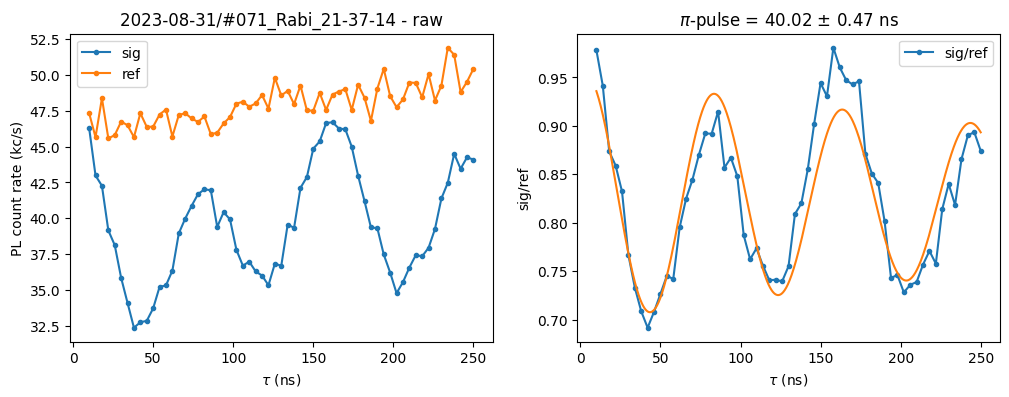

In [15]:
filename = "C:/Users/lukin2dmaterials/data/2023-08-31/#071_Rabi_21-37-14/RabiObject_sig_set.dat"
guess=(0.2, 50, 0, 0.9, 600)
dr.readData(filename, type='RabiDecay', guess=guess, ifFit=1);

In [2]:
# Repeat measuring SCC photon stats, sweeping ts-i
days = np.linspace(23,23,1)
wanted_idx = 23
dataArr = []; gArr = []; err_gArr = []; sigs = None; refs = None
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-08-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'SCCPhStatSweepDelaySI' in dataFolder:
            idx = int(dataFolder[1:4])
            if idx == wanted_idx:
                finalDataFolder = mainFolder + dataFolder
                datafile = finalDataFolder +'/SCCPhStatSweepDelaySIObject_sig_set.dat'
                power589 = 2; power532 = 1400; power635 = 9
                t532 = 500e3; delay1 = 20e6; delay2 = 20; tsh = 20; ti = 200; delay4 = 2e6; tr_ns = 15e6

                sig, ref, hist2DArray_sig, hist2DArray_ref, xplot, yplot, bins1DArray = dr.readDataFullData(
                                    datafile, num_of_bins=50, binwidth=1, plot_hist_every=100, ifPlot=False,
                                    ifDataSavedAsCountRate=False, ifLogColor=True, ifSubtractRef=False, ifPlotRef=False,)
                if sigs is None: sigs = sig
                else: sigs = np.concatenate((sigs, sig),axis=1)
                if refs is None: refs = ref
                else: refs = np.concatenate((refs, ref),axis=1)
                

In [11]:
np.shape(sigs)

(14, 2000)

In [ ]:
ms = -1
tshis = np.array((20,150,300,400,500,600,700,800,900,1000,1100,1300,1600,2000))

ths, fids, pms, snrs, gms, g0s, nms, n0s, nMeanms, nMean0s = dr.plotHistSweepTIon(sigs, tshis, 
                ifPlot=1, ms=ms, power589=power589, power532=power532, power635=power635,
                t532=t532, delay1=delay1, delay2=delay2, tsh=tsh, ti=ti, delay4=delay4, tr_ns=tr_ns, finalDataFolder=finalDataFolder,
                gm=7,g0=7,nm=652,n0=80)

ms = 0
thsref, fidsref, pmsref, snrsref, gmsref, g0sref, nmsref, n0sref, nMeanmsref, nMean0sref = dr.plotHistSweepTIon(refs, tshis, 
                ifPlot=1, ms=ms, power589=power589, power532=power532, power635=power635,
                t532=t532, delay1=delay1, delay2=delay2, tsh=tsh, ti=ti, delay4=delay4, tr_ns=tr_ns, finalDataFolder=finalDataFolder,
                gm=7,g0=7,nm=652,n0=80)

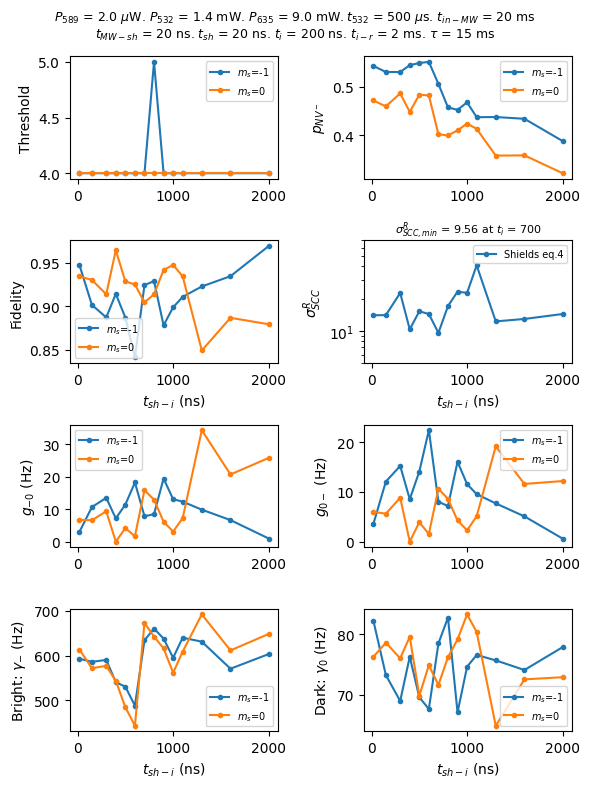

In [13]:
dr.plotAnalysisSweepTIon(finalDataFolder, power589=power589, power532=power532, power635=power635,
                t532=t532, delay1=delay1, delay2=delay2, tsh=tsh, ti=ti, delay4=delay4, tr_ns=tr_ns,
                ifYlim=1, ylim=(5,70));

In [27]:
a = np.logspace(2,np.log10(30e6),31)
b = np.round(a,-1)
print(np.array_str(b, suppress_small=1))

[     100.      150.      230.      350.      540.      820.     1250.
     1900.     2890.     4400.     6690.    10190.    15520.    23630.
    35970.    54770.    83390.   126970.   193320.   294340.   448140.
   682310.  1038860.  1581710.  2408220.  3666640.  5582620.  8499810.
 12941360. 19703830. 30000000.]


# T1

In [56]:
# Repeat measuring T1 SCC
days = np.linspace(2,2,1)
wanted_idx = 2
dataArr = []; gArr = []; err_gArr = []; sigs = None; refs = None
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-09-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'T1SCC' in dataFolder:
            idx = int(dataFolder[1:4])
            if idx == wanted_idx:
                finalDataFolder = mainFolder + dataFolder
                datafile = finalDataFolder +'/T1SCCObject_sig_set.dat'
                power589 = 9.5; power532 = 105; power635 = 30
                t532 = 30e3; delay1 = 5e3; tsh = 40; delay3 = 600; ti=100; delay4 = 0.5e6; tr_ns = 1e6

                sig, ref, hist2DArray_sig, hist2DArray_ref, xplot, yplot, bins1DArray = dr.readDataFullData(
                                    datafile, num_of_bins=50, binwidth=1, plot_hist_every=100, ifPlot=False,
                                    ifDataSavedAsCountRate=False, ifLogColor=True, ifSubtractRef=False, ifPlotRef=False,)
                if sigs is None: sigs = sig
                else: sigs = np.concatenate((sigs, sig),axis=1)
                if refs is None: refs = ref
                else: refs = np.concatenate((refs, ref),axis=1)
print(np.shape(sigs))
# tMWshs = np.round(np.logspace(2,np.log10(30e6),31),-1)
# tMWshs = np.round(np.logspace(3,8,25),-1)
# tMWshs = np.round(np.logspace(3,np.log10(40e6),23),-1)
# tMWshs = np.round(np.logspace(3,np.log10(25e6),21),-1)
tMWshs = np.round(np.logspace(3,np.log10(15e6),21),-1)
sigavg = np.average(sigs,axis=1); refavg = np.average(refs,axis=1)
                

(21, 5000)


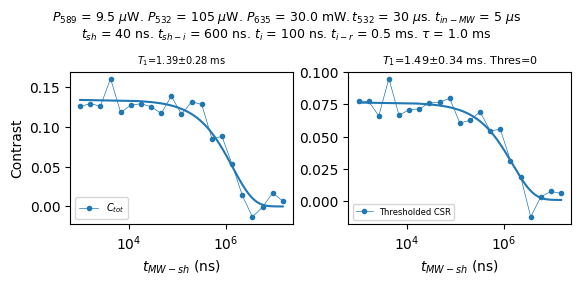

In [57]:
t1s, t1s_err = dr.plotT1Simple(tMWshs, sigs, refs, thresmax=3, power589=power589, power532=power532, power635=power635,
                t532=t532, delay1=delay1, tsh=tsh, delay3=delay3, ti=ti, delay4=delay4, tr_ns=tr_ns)

In [63]:
snr

array([ 0.15684914,  0.16592624,  0.1623376 ,  0.20769788,  0.1511971 ,
        0.1656825 ,  0.16564522,  0.16327908,  0.15150614,  0.18067304,
        0.14873387,  0.1678839 ,  0.16391275,  0.10785772,  0.11139373,
        0.06655775,  0.01725275, -0.01674156, -0.0016235 ,  0.02037171,
        0.00806032])

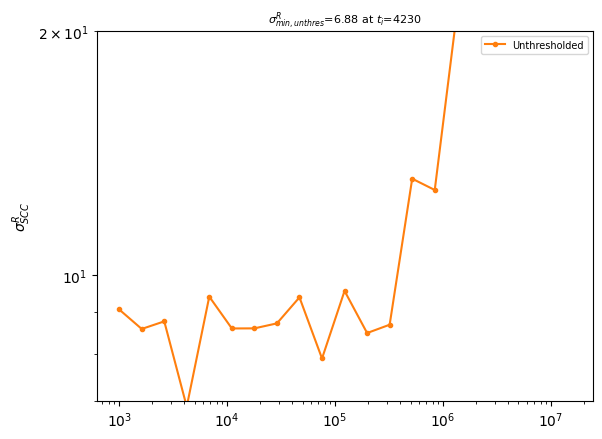

In [65]:
snr = (sigavg-refavg)/np.sqrt(sigavg+refavg)
sigmaUnThres = np.sqrt(1 + 2/snr**2)

fig, ax = plt.subplots()
ax.plot(tMWshs,sigmaUnThres,'o-', markersize=3, label="Unthresholded", color='C1')
ax.set_ylabel("$\sigma^R_{SCC}$")
ax.set_yscale('log')
ax.set_xscale('log')
s1 = "$\sigma^R_{min, unthres}$=%.2f at $t_i$=%.0f" % (np.min(sigmaUnThres), tMWshs[np.argmin(sigmaUnThres)])
ax.set_title(s1, fontsize=8)
ax.legend(fontsize=7)
ax.set_ylim((7,20))

plt.show()

In [ ]:
ms = -1
ifPlot=1

ths, fids, pms, snrs, gms, g0s, nms, n0s, nMeanms, nMean0s = dr.plotHistSweepTIon(sigs, tMWshs, 
                ifPlot=ifPlot, ms=ms, power589=power589, power532=power532, power635=power635,
                t532=t532, delay1=delay1, tsh=tsh, delay3=delay3, ti=ti, delay4=delay4, tr_ns=tr_ns, finalDataFolder=finalDataFolder,
                gm=50,g0=50,nm=652,n0=80)

ms = 0
thsref, fidsref, pmsref, snrsref, gmsref, g0sref, nmsref, n0sref, nMeanmsref, nMean0sref = dr.plotHistSweepTIon(refs, tMWshs, 
                ifPlot=ifPlot, ms=ms, power589=power589, power532=power532, power635=power635,
                t532=t532, delay1=delay1, tsh=tsh, delay3=delay3, ti=ti, delay4=delay4, tr_ns=tr_ns, finalDataFolder=finalDataFolder,
                gm=50,g0=50,nm=652,n0=80)

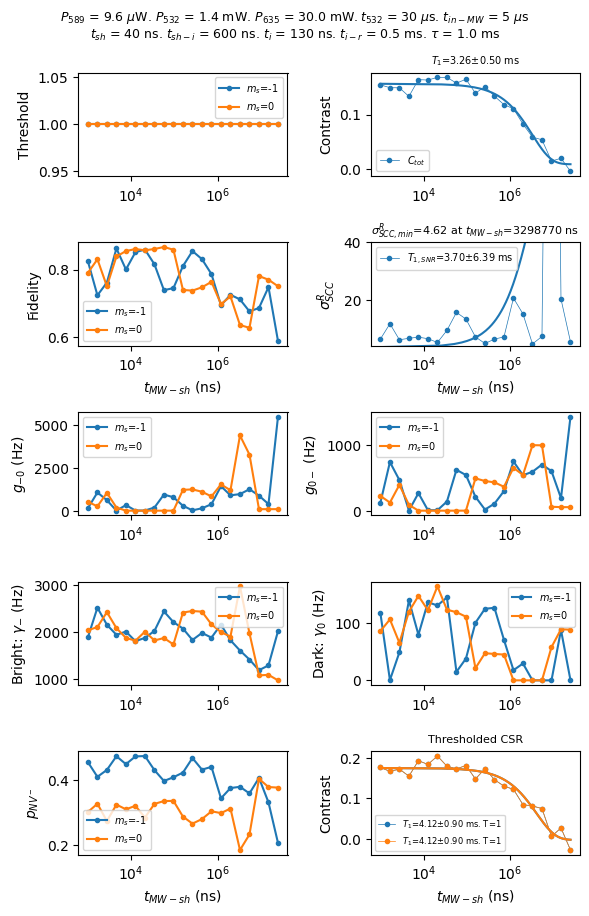

In [4]:
tis, ths, fids, pms, snrs, gms, g0s, nms, n0s, nMeanms, nMean0s, thsref, fidsref, pmsref, snrsref, gmsref, g0sref, nmsref, n0sref, nMeanmsref, nMean0sref, sigmaSCC, sigavg, refavg, t1s, t1s_err = dr.plotAnalysisT1SCC(finalDataFolder, 
                power589=power589, power532=power532, power635=power635,
                t532=t532, delay1=delay1, tsh=tsh, delay3=delay3, ti=ti, delay4=delay4, tr_ns=tr_ns,
                ifYlim=1, ylim=(4,40))

In [ ]:
(row, col) = np.shape(sigs)

sigsThd = np.zeros((row, col))
for i in range(row):
    for j in range(col):
        if sigs[i,j] > ths[i]: sigsThd[i,j] = 1

refsThd = np.zeros((row, col))
for i in range(row):
    for j in range(col):
        if refs[i,j] > thsref[i]: refsThd[i,j] = 1
sigThdAvg = np.average(sigsThd,axis=1); refThdAvg = np.average(refsThd,axis=1)
c = (sigThdAvg-refThdAvg)/(sigThdAvg+refThdAvg)
x = tis; a = np.max(c)
guess = (a,0,1e6)
xfit, yfit, popt, perr = dr.fitDecay(x,c,guess=guess)

fig, ax = plt.subplots(figsize=(4,3))
# ax.plot(tis, sigThdAvg)
# ax.plot(tis, refThdAvg)
ax.plot(tis, c,'o-', markersize=3)
ax.plot(xfit, yfit)
ax.set_xscale('log')
ax.set_xlabel("$t_{MW-sh}$ (ns)")
ax.set_ylabel("Contrast")

s = "$T_{1}$=%.2f$\pm$%.2f ms. Thresholded" % (popt[2]/1e6, perr[2]/1e6)
ax.set_title(s, fontsize=10)


plt.tight_layout()
plt.show()

In [ ]:
for thres in np.linspace(0,3,4):
    (row, col) = np.shape(sigs)

    sigsThd = np.zeros((row, col))
    for i in range(row):
        for j in range(col):
            if sigs[i,j] > thres: sigsThd[i,j] = 1

    refsThd = np.zeros((row, col))
    for i in range(row):
        for j in range(col):
            if refs[i,j] > thres: refsThd[i,j] = 1
    sigThdAvg = np.average(sigsThd,axis=1); refThdAvg = np.average(refsThd,axis=1)
    c = (sigThdAvg-refThdAvg)/(sigThdAvg+refThdAvg)
    x = tis; a = np.max(c)
    guess = (a,0,1e6)
    xfit, yfit, popt, perr = dr.fitDecay(x,c,guess=guess)

    fig, ax = plt.subplots(figsize=(4,3))
    # ax.plot(tis, sigThdAvg)
    # ax.plot(tis, refThdAvg)
    ax.plot(tis, c,'o-', markersize=3)
    ax.plot(xfit, yfit)
    ax.set_xscale('log')
    ax.set_xlabel("$t_{MW-sh}$ (ns)")
    ax.set_ylabel("Contrast")

    s = "$T_{1}$=%.2f$\pm$%.2f ms. Threshold=%.0f" % (popt[2]/1e6, perr[2]/1e6, thres)
    ax.set_title(s, fontsize=10)


    plt.tight_layout()
    plt.show()

In [14]:
np.shape(sigsThd)

(31, 2000)

## Repeat measuring T1SCC, sweeping navg and tr

In [4]:
days = np.linspace(25,25,1)
trs = np.array((7.5e6, 10e6, 15e6))
for i, tr in enumerate(trs):
    dataArr = []; gArr = []; err_gArr = []; sigs = None; refs = None
    for day in days:
        mainFolder = 'C:/Users/lukin2dmaterials/data/2023-08-' + str(int(day)).zfill(2) + '/'
        for dataFolder in os.listdir(mainFolder):
            if 'T1SCC' in dataFolder:
                idx = int(dataFolder[1:4])
                if idx == i+4:
                    finalDataFolder = mainFolder + dataFolder
                    datafile = finalDataFolder +'/T1SCCObject_sig_set.dat'
                    power589 = 2; power532 = 1400; power635 = 9
                    t532 = 500e3; delay1 = 20e6; tsh = 20; delay3 = 600; ti=180; delay4 = 2e6; tr_ns = tr

                    sig, ref, hist2DArray_sig, hist2DArray_ref, xplot, yplot, bins1DArray = dr.readDataFullData(
                                        datafile, num_of_bins=50, binwidth=1, plot_hist_every=100, ifPlot=False,
                                        ifDataSavedAsCountRate=False, ifLogColor=True, ifSubtractRef=False, ifPlotRef=False,)
                    if sigs is None: sigs = sig
                    else: sigs = np.concatenate((sigs, sig),axis=1)
                    if refs is None: refs = ref
                    else: refs = np.concatenate((refs, ref),axis=1)
    print(np.shape(sigs))
    tMWshs = np.round(np.logspace(2,np.log10(30e6),31),-1)
    tMWshs = np.round(np.logspace(3,8,25),-1)
    sigavg = np.average(sigs,axis=1); refavg = np.average(refs,axis=1)
    ifPlot = 0
    
    ms = -1
    ths, fids, pms, snrs, gms, g0s, nms, n0s, nMeanms, nMean0s = dr.plotHistSweepTIon(sigs, tMWshs, 
                    ifPlot=ifPlot, ms=ms, power589=power589, power532=power532, power635=power635,
                    t532=t532, delay1=delay1, tsh=tsh, delay3=delay3, ti=ti, delay4=delay4, tr_ns=tr_ns, finalDataFolder=finalDataFolder,
                    gm=7,g0=7,nm=652,n0=80)
    ms = 0
    thsref, fidsref, pmsref, snrsref, gmsref, g0sref, nmsref, n0sref, nMeanmsref, nMean0sref = dr.plotHistSweepTIon(refs, tMWshs, 
                ifPlot=ifPlot, ms=ms, power589=power589, power532=power532, power635=power635,
                t532=t532, delay1=delay1, tsh=tsh, delay3=delay3, ti=ti, delay4=delay4, tr_ns=tr_ns, finalDataFolder=finalDataFolder,
                gm=7,g0=7,nm=652,n0=80)

(25, 3000)
(25, 3000)
(25, 3000)


In [ ]:
# Repeat plotting analysis of T1SCC sweeping tMW-sh
days = np.linspace(25,25,1)
trs = np.array((7.5e6, 10e6, 15e6))
pmss = None; pmsrefs = None; sigmaSCCs = None

for i, tr in enumerate(trs):
    for day in days:
        mainFolder = 'C:/Users/lukin2dmaterials/data/2023-08-' + str(int(day)).zfill(2) + '/'
        for dataFolder in os.listdir(mainFolder):
            if 'T1SCC' in dataFolder:
                idx = int(dataFolder[1:4])
                if idx == i+4:
                    finalDataFolder = mainFolder + dataFolder
                    datafile = finalDataFolder +'/T1SCCObject_sig_set.dat'
                    power589 = 2; power532 = 1400; power635 = 9
                    t532 = 200e3; delay1 = 10e6; tsh = 20; delay3 = 600; ti=180; delay4 = 2e6; tr_ns = tr

                    tis, ths, fids, pms, snrs, gms, g0s, nms, n0s, nMeanms, nMean0s, thsref, fidsref, pmsref, snrsref, gmsref, g0sref, nmsref, n0sref, nMeanmsref, nMean0sref, sigmaSCC, sigavg, refavg, t1s, t1s_err = dr.plotAnalysisT1SCC(finalDataFolder, 
                        power589=power589, power532=power532, power635=power635,
                        t532=t532, delay1=delay1, tsh=tsh, delay3=delay3, ti=ti, delay4=delay4, tr_ns=tr_ns,
                        ifYlim=1, ylim=(7,100))
                    if pmss is None: pmss = pms
                    else: pmss = np.concatenate((pmss, pms))
                    if pmsrefs is None: pmsrefs = pmsref
                    else: pmsrefs = np.concatenate((pmsrefs, pmsref))
                    if sigmaSCCs is None: sigmaSCCs = sigmaSCC
                    else: sigmaSCCs = np.concatenate((sigmaSCCs, sigmaSCC))
pmss = pmss.reshape(len(trs), len(tis))
pmsrefs = pmsrefs.reshape(len(trs), len(tis))
sigmaSCCs = sigmaSCCs.reshape(len(trs), len(tis))

# Stability check: repeat t1 with same params

In [41]:
# days = np.linspace(28, 28, 1)
# idxs = np.linspace(4, 12, 9)
# for i, dummy in enumerate(idxs):
#     dataArr = []; gArr = []; err_gArr = []; sigs = None; refs = None
#     for day in days:
#         mainFolder = 'C:/Users/lukin2dmaterials/data/2023-08-' + str(int(day)).zfill(2) + '/'
#         for dataFolder in os.listdir(mainFolder):
#             if 'T1SCC' in dataFolder:
#                 idx = int(dataFolder[1:4])
#                 if idx == i+4:
#                     finalDataFolder = mainFolder + dataFolder
#                     datafile = finalDataFolder +'/T1SCCObject_sig_set.dat'
#                     power589 = 2; power532 = 1400; power635 = 30
#                     t532 = 30e3; delay1 = 1e6; tsh = 40; delay3 = 600; ti=80; delay4 = 3e6; tr_ns = 7.5e6

#                     sig, ref, hist2DArray_sig, hist2DArray_ref, xplot, yplot, bins1DArray = dr.readDataFullData(
#                                         datafile, num_of_bins=50, binwidth=1, plot_hist_every=100, ifPlot=False,
#                                         ifDataSavedAsCountRate=False, ifLogColor=True, ifSubtractRef=False, ifPlotRef=False,)
#                     if sigs is None: sigs = sig
#                     else: sigs = np.concatenate((sigs, sig),axis=1)
#                     if refs is None: refs = ref
#                     else: refs = np.concatenate((refs, ref),axis=1)
#     print(np.shape(sigs))
#     tMWshs = np.round(np.logspace(3,np.log10(25e6),21),-1)
#     sigavg = np.average(sigs,axis=1); refavg = np.average(refs,axis=1)
#     ifPlot = 0
    
#     ms = -1
#     ths, fids, pms, snrs, gms, g0s, nms, n0s, nMeanms, nMean0s = dr.plotHistSweepTIon(sigs, tMWshs, 
#                     ifPlot=ifPlot, ms=ms, power589=power589, power532=power532, power635=power635,
#                     t532=t532, delay1=delay1, tsh=tsh, delay3=delay3, ti=ti, delay4=delay4, tr_ns=tr_ns, finalDataFolder=finalDataFolder,
#                     gm=40,g0=40,nm=652,n0=80)
#     ms = 0
#     thsref, fidsref, pmsref, snrsref, gmsref, g0sref, nmsref, n0sref, nMeanmsref, nMean0sref = dr.plotHistSweepTIon(refs, tMWshs, 
#                 ifPlot=ifPlot, ms=ms, power589=power589, power532=power532, power635=power635,
#                 t532=t532, delay1=delay1, tsh=tsh, delay3=delay3, ti=ti, delay4=delay4, tr_ns=tr_ns, finalDataFolder=finalDataFolder,
#                 gm=40,g0=40,nm=652,n0=80)

In [37]:
# Repeat plotting analysis of T1SCC sweeping tMW-sh
days = np.linspace(27, 28, 2)
pmss = None; pmsrefs = None; sigmaSCCs = None; t1ss = None; t1s_errs = None

i=0
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-08-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        if 'T1SCC' in dataFolder:
            idx = int(dataFolder[1:4])
            if (day==27 and idx >=14) or (day==28 and idx <=32):
                finalDataFolder = mainFolder + dataFolder
                datafile = finalDataFolder +'/T1SCCObject_sig_set.dat'
                power589 = 2; power532 = 1400; power635 = 30
                t532 = 30e3; delay1 = 1e6; tsh = 40; delay3 = 600; ti=80; delay4 = 3e6; tr_ns = 7.5e6
                ifPlot = 0

                tis, ths, fids, pms, snrs, gms, g0s, nms, n0s, nMeanms, nMean0s, thsref, fidsref, pmsref, snrsref, gmsref, g0sref, nmsref, n0sref, nMeanmsref, nMean0sref, sigmaSCC, sigavg, refavg, t1s, t1s_err = dr.plotAnalysisT1SCC(finalDataFolder, 
                    power589=power589, power532=power532, power635=power635,
                    t532=t532, delay1=delay1, tsh=tsh, delay3=delay3, ti=ti, delay4=delay4, tr_ns=tr_ns,
                    ifYlim=1, ylim=(7,100), ifPlot=ifPlot)
                if pmss is None: pmss = pms
                else: pmss = np.concatenate((pmss, pms))
                if pmsrefs is None: pmsrefs = pmsref
                else: pmsrefs = np.concatenate((pmsrefs, pmsref))
                if sigmaSCCs is None: sigmaSCCs = sigmaSCC
                else: sigmaSCCs = np.concatenate((sigmaSCCs, sigmaSCC))
                if t1ss is None: t1ss = t1s
                else: t1ss = np.concatenate((t1ss, t1s))
                if t1s_errs is None: t1s_errs = t1s_err
                else: t1s_errs = np.concatenate((t1s_errs, t1s_err))
                i=i+1
# pmss     = pmss.reshape(i, len(tis))
# pmsrefs  = pmsrefs.reshape(i, len(tis))
# sigmaSCCs  = sigmaSCCs.reshape(i, len(tis))
t1ss     = t1ss.reshape(i, len(t1s))
t1s_errs = t1s_errs.reshape(i, len(t1s))

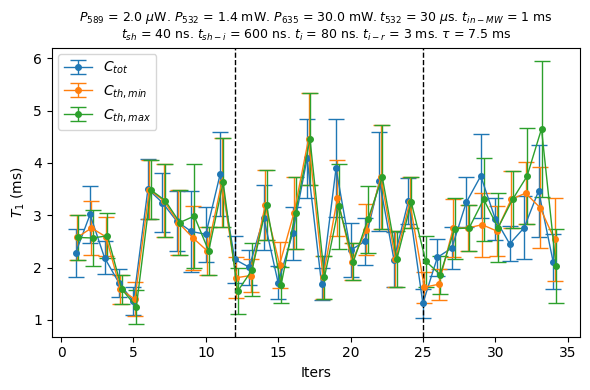

In [38]:
fig, ax = plt.subplots(figsize=(6,4))
x = np.arange(i)+1

# ax.errorbar(x, t1ss[:,0], t1s_errs[:,0], label="$C_{NV^-}$", markersize=4, linewidth=1, elinewidth=1, fmt='o-', capsize=6)
ax.errorbar(x, t1ss[:,1], t1s_errs[:,1], label="$C_{tot}$", markersize=4, linewidth=1, elinewidth=1, fmt='o-', capsize=6)
ax.errorbar(x+0.1, t1ss[:,2], t1s_errs[:,2], label="$C_{th,min}$", markersize=4, linewidth=1, elinewidth=1, fmt='o-', capsize=6)
ax.errorbar(x+0.2, t1ss[:,3], t1s_errs[:,3], label="$C_{th,max}$", markersize=4, linewidth=1, elinewidth=1, fmt='o-', capsize=6)
ax.legend()
ax.set_xlabel("Iters")
ax.set_ylabel("$T_1$ (ms)")
plt.axvline(x=12, linestyle='--', linewidth=1,color='k')
plt.axvline(x=25, linestyle='--', linewidth=1,color='k')

s1 = "$P_{589}$ = %.1f $\mu$W. $P_{532}$ = %.1f mW. $P_{635}$ = %.1f mW$. t_{532}$ = %.0f $\mu$s. $t_{in-MW}$ = %.0f ms" % (power589, power532/1e3, power635, t532/1e3, delay1/1e6)
s2 = r"$t_{sh}$ = %.0f ns. $t_{sh-i}$ = %.0f ns. $t_{i}$ = %.0f ns. $t_{i-r}$ = %.0f ms. $\tau$ = %.1f ms" % (tsh, delay3, ti, delay4/1e6, tr_ns/1e6)
ax.set_title(s1  +  "\n" + s2, fontsize=9);

plt.tight_layout()
plt.show()

# Stability check, simple plot

In [7]:
# Repeat plotting analysis of T1SCC sweeping tMW-sh
days = np.linspace(2,3,2)
t1ss = None; t1s_errs = None
tMWshs = np.round(np.logspace(3,np.log10(15e6),21),-1)

i=0
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-09-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        if 'T1SCC' in dataFolder:
            idx = int(dataFolder[1:4])
            if (day==2 and idx >=6) or (day==3 and idx<=82):
                finalDataFolder = mainFolder + dataFolder
                datafile = finalDataFolder +'/T1SCCObject_sig_set.dat'
                power589 = 9.5; power532 = 105; power635 = 30
                t532 = 30e3; delay1 = 5e3; tsh = 40; delay3 = 600; ti=100; delay4 = 0.5e6; tr_ns = 1e6
                ifPlot = 0

                sig, ref, hist2DArray_sig, hist2DArray_ref, xplot, yplot, bins1DArray = dr.readDataFullData(
                                    datafile, num_of_bins=50, binwidth=1, plot_hist_every=100, ifPlot=False,
                                    ifDataSavedAsCountRate=False, ifLogColor=True, ifSubtractRef=False, ifPlotRef=False,)
                sigavg = np.average(sig,axis=1); refavg = np.average(ref,axis=1)
                ifPlot=0
                
                t1s, t1s_err = dr.plotT1Simple(tMWshs, sig, ref, thresmax=2, power589=power589, power532=power532, power635=power635,
                        t532=t532, delay1=delay1, tsh=tsh, delay3=delay3, ti=ti, delay4=delay4, tr_ns=tr_ns,ifPlot=ifPlot)
                
                if t1ss is None: t1ss = t1s
                else: t1ss = np.concatenate((t1ss, t1s))
                if t1s_errs is None: t1s_errs = t1s_err
                else: t1s_errs = np.concatenate((t1s_errs, t1s_err))
                i=i+1
t1ss     = t1ss.reshape(i, len(t1s))
t1s_errs = t1s_errs.reshape(i, len(t1s))

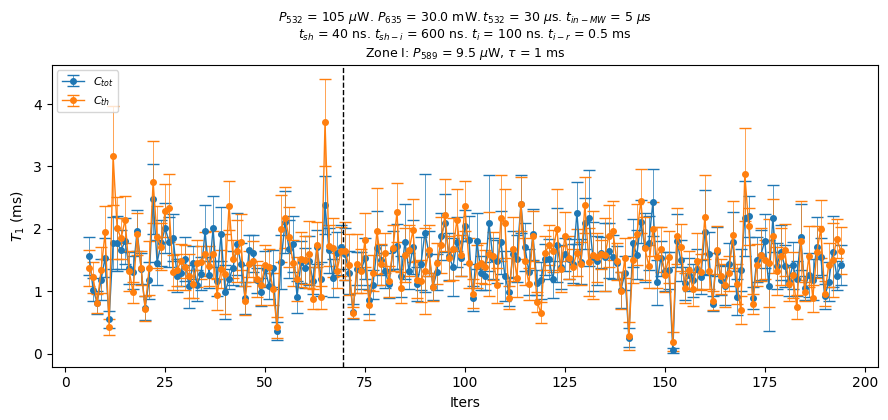

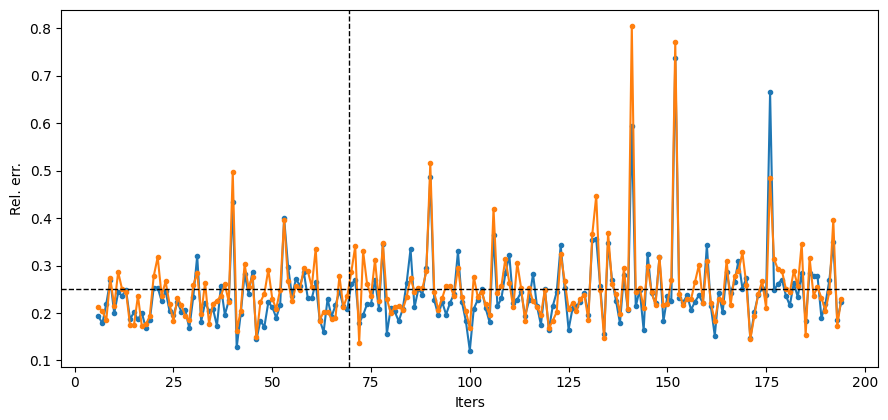

In [8]:
fig, ax = plt.subplots(figsize=(9,4.3))
x = np.arange(i)+6

ax.errorbar(x, t1ss[:,0], t1s_errs[:,0], label="$C_{tot}$", markersize=4, linewidth=1, elinewidth=0.5, fmt='o-', capsize=4)
ax.errorbar(x, t1ss[:,1], t1s_errs[:,1], label="$C_{th}$", markersize=4, linewidth=1, elinewidth=0.5, fmt='o-', capsize=4)
ax.legend(fontsize=8, loc='upper left')
ax.set_xlabel("Iters")
ax.set_ylabel("$T_1$ (ms)")
plt.axvline(x=69.5, linestyle='--', linewidth=1,color='k')
# plt.axvline(x=34.5, linestyle='--', linewidth=1,color='k')
# plt.axvline(x=46.5, linestyle='--', linewidth=1,color='k')
# plt.axvline(x=54.5, linestyle='--', linewidth=1,color='k')
# plt.axvline(x=63.5, linestyle='--', linewidth=0.3,color='k')
# plt.axvline(x=111.5, linestyle='--', linewidth=0.3,color='k')

s1 = "$P_{532}$ = %.0f $\mu$W. $P_{635}$ = %.1f mW$. t_{532}$ = %.0f $\mu$s. $t_{in-MW}$ = %.0f $\mu$s" % (power532, power635, t532/1e3, delay1/1e3)
s2 = r"$t_{sh}$ = %.0f ns. $t_{sh-i}$ = %.0f ns. $t_{i}$ = %.0f ns. $t_{i-r}$ = %.1f ms" % (tsh, delay3, ti, delay4/1e6)
s3 = "Zone I: $P_{589}$ = 9.5 $\mu$W, $\\tau$ = 1 ms"
# s4 = "Zone IV: $P_{589}$=5.7 $\mu$W, $\\tau$=1.2 ms. Zone IV: $P_{589}$=9.5 $\mu$W, $\\tau$=1 ms"
ax.set_title(s1  +  "\n" + s2 + "\n" + s3, fontsize=9);
plt.tight_layout()

fig, ax = plt.subplots(figsize=(9,4.3))
ax.plot(x, t1s_errs[:,0]/t1ss[:,0], 'o-',markersize=3)
ax.plot(x, t1s_errs[:,1]/t1ss[:,1], 'o-',markersize=3)
ax.set_xlabel("Iters")
ax.set_ylabel("Rel. err.")
plt.axhline(y=0.25, linestyle='--', linewidth=1,color='k')
plt.axvline(x=69.5, linestyle='--', linewidth=1,color='k')

plt.tight_layout()
plt.show()

# T1 Conventional readout

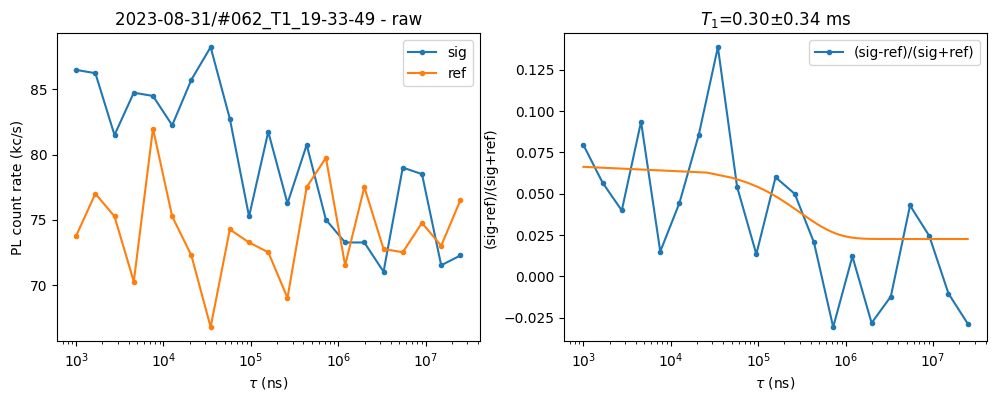

(21,)


In [6]:
# Repeat measuring T1 SCC
days = np.linspace(31,31,1)
wanted_idx = 62
dataArr = []; gArr = []; err_gArr = []; sigs = None; refs = None
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-08-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'T1_' in dataFolder:
            idx = int(dataFolder[1:4])
            if idx == wanted_idx:
                finalDataFolder = mainFolder + dataFolder
                datafile = finalDataFolder +'/T1Object_sig_set.dat'
                power589 = 9.7; power532 = 1400; power635 = 30
                t532 = 30e3; delay1 = 5e3; tsh = 40; delay3 = 600; ti=130; delay4 = 0.5e6; tr_ns = 1e6

                sig, ref, popt, perr, x_s, sig, ref = dr.readData(datafile, type='T1', typeNorm=1, guess=None, ifPlot=True, ifPrint=True,
                                    ifFit=1, upperBounds=None, lowerBounds=None, endDataPoint=None, startDataPoint=None);
                if sigs is None: sigs = sig
                else: sigs = np.concatenate((sigs, sig),axis=1)
                if refs is None: refs = ref
                else: refs = np.concatenate((refs, ref),axis=1)
print(np.shape(sigs))
tMWshs = np.round(np.logspace(3,np.log10(25e6),21),-1)
# tMWshs = tMWshs[0:20]
# sigavg = np.average(sigs,axis=1); refavg = np.average(refs,axis=1)
                